In [1]:
import os
import numpy as np
import tensorflow as tf

In [2]:
train_p = 'train'
test_p = 'test'

hd_path = 'train/hotdog'
nhd_path = 'train/nothotdog'


In [3]:
train_data_hd = [os.path.join(hd_path, filename) for filename in os.listdir(hd_path)]
train_data_nhd = [os.path.join(nhd_path, filename) for filename in os.listdir(nhd_path)]

In [4]:
train_data_hd[:5]

['train/hotdog\\1.jpg',
 'train/hotdog\\10.jpg',
 'train/hotdog\\100.jpg',
 'train/hotdog\\1000.jpg',
 'train/hotdog\\1001.jpg']

In [5]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
IM_SIZE = 224
number_of_classes = 2

In [7]:
data_gen = ImageDataGenerator(rotation_range=30)

In [8]:
train_gen = data_gen.flow_from_directory(
    train_p,
    target_size=(IM_SIZE, IM_SIZE),
    batch_size=498,
    class_mode='categorical',
)

Found 3000 images belonging to 2 classes.


In [9]:
train_gen

In [10]:
train_gen[0][0].shape  # 1 batch (0th batch)

In [ ]:
train_gen[0][0][0].shape  # 0th image of 0th batch of train_data

(224, 224, 3)

In [ ]:
val_gen = data_gen.flow_from_directory(
    test_p,
    target_size=(IM_SIZE, IM_SIZE),
    batch_size=500,
    class_mode='categorical'
)

Found 644 images belonging to 2 classes.


# **IMAGE PREPROCESSING**

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
def read_and_preprocess_imgs(im_paths, im_h, im_w):
    imgs = [load_img(img_path, target_size=(im_h, im_w)) for img_path in im_paths]
    img_array = np.array([img_to_array(im) for im in imgs])
    output = preprocess_input(img_array)

    return (output)

In [ ]:
train_data_h = read_and_preprocess_imgs(train_data_hd, 224, 224)
train_data_nhs = read_and_preprocess_imgs(train_data_nhd, 224, 224)

In [ ]:
train_data_h.shape

(1500, 224, 224, 3)

In [ ]:
import matplotlib.pyplot as plt

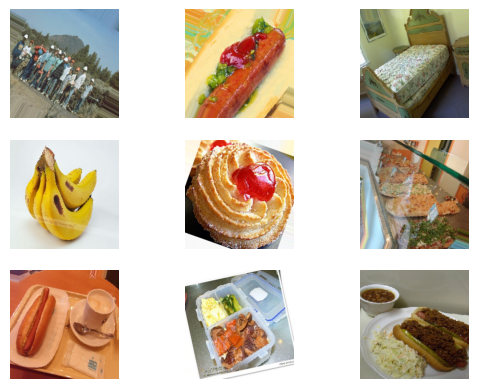

In [ ]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.axis('off')
    plt.imshow(train_gen[0][0][i].astype('uint8'));

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


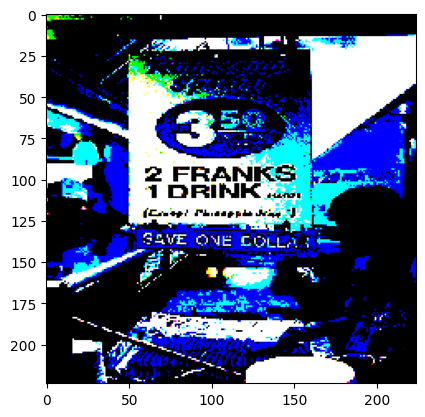

In [ ]:
data = train_data_h[0]
plt.imshow(data);

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import CategoricalCrossentropy, BinaryCrossentropy

In [ ]:
model = Sequential([
    InputLayer(input_shape=(IM_SIZE, IM_SIZE, 3)),
    Conv2D(filters=8, kernel_size=(3, 3), activation='relu'),
    Dropout(0.3),
    Conv2D(filters=8, kernel_size=(3, 3), activation='relu'),
    Dropout(0.3),
    Conv2D(filters=8, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=8, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=8, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=8, kernel_size=(3, 3), activation='relu'),

    Flatten(),

    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(number_of_classes, activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 8)       224       
                                                                 
 dropout (Dropout)           (None, 222, 222, 8)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 8)       584       
                                                                 
 dropout_1 (Dropout)         (None, 220, 220, 8)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 8)       584       
                                                                 
 conv2d_3 (Conv2D)           (None, 216, 216, 8)       584       
                                                                 
 conv2d_4 (Conv2D)           (None, 214, 214, 8)       

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=BinaryCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
train_gen[0][0].shape

(498, 224, 224, 3)

In [ ]:
train_gen[0][1].shape

(498, 2)

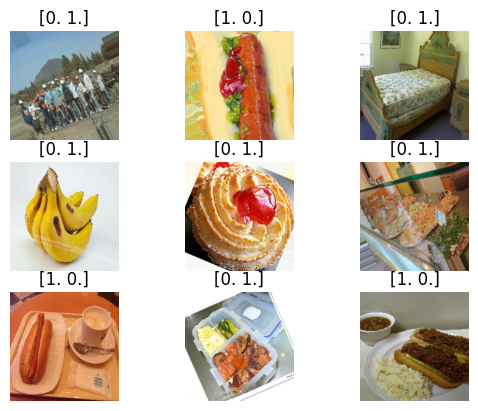

In [ ]:
for i, e in enumerate(train_gen[0][0][:9]):
    plt.subplot(3, 3, i + 1)
    plt.title(train_gen[0][1][i])
    plt.imshow(e.astype('uint8'));
    plt.axis('off')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
m_cp = ModelCheckpoint(
    'checkpoint_models/',
    monitor='val_accuracy',
    mode="auto",
    save_freq="epoch",
)

In [ ]:
X_train = (train_gen[0][0] / 255)
y_train = (train_gen[0][1])

X_test = (val_gen[0][0] / 255)
y_test = (val_gen[0][1])

In [ ]:
hist = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=50,
    verbose=2,
)

Epoch 1/50


2/2 - 9s - loss: 143.2213 - accuracy: 0.4980 - val_loss: 4.5390 - val_accuracy: 0.5080 - 9s/epoch - 4s/step
Epoch 2/50
2/2 - 6s - loss: 8.0187 - accuracy: 0.5120 - val_loss: 0.6931 - val_accuracy: 0.5080 - 6s/epoch - 3s/step
Epoch 3/50
2/2 - 6s - loss: 0.6938 - accuracy: 0.5120 - val_loss: 0.6931 - val_accuracy: 0.5080 - 6s/epoch - 3s/step
Epoch 4/50
2/2 - 6s - loss: 0.6929 - accuracy: 0.5120 - val_loss: 0.6931 - val_accuracy: 0.5080 - 6s/epoch - 3s/step
Epoch 5/50
2/2 - 6s - loss: 0.6930 - accuracy: 0.5120 - val_loss: 0.6931 - val_accuracy: 0.5080 - 6s/epoch - 3s/step
Epoch 6/50


: 

In [ ]:
model.evaluate(X_test, y_test)

16/16 [==============================] - 1s 74ms/step - loss: 0.6886 - accuracy: 0.5080


[0.6885764598846436, 0.5080000162124634]

In [ ]:
y_pred = model.predict(X_test)

16/16 [==============================] - 1s 76ms/step


In [ ]:
y_pred[:5]

array([[0.5492184 , 0.45078158],
       [0.53634655, 0.46365348],
       [0.52905726, 0.4709427 ],
       [0.7798314 , 0.22016865],
       [0.51729614, 0.48270383]], dtype=float32)

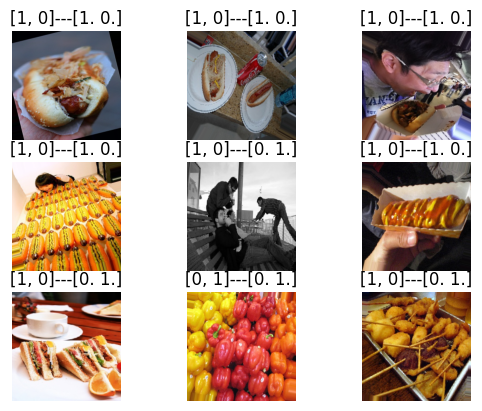

In [ ]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.axis('off')
    plt.title(f'{list(map(round, y_pred[i]))}---{y_test[i]}')
    plt.imshow(X_test[i]);

Enough for now